In [1]:
from __future__ import division

import os
import operator
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

%matplotlib inline

Using TensorFlow backend.


In [43]:
def plot_images(images, max_col=4):
    plt.figure(figsize=(8,8))
    rows = (len(images)-1)// max_col + 1
    
    for ix, image in enumerate(images):
        plt.subplot(rows, max_col, ix+1)
        plt.imshow(image.reshape(28, 28), cmap='gray_r')
    plt.tight_layout()
    plt.show()

In [44]:
data_files = {'cifar': '../data/cifar.npy',
              'mnist': '../data/mnist.npy',
              'lfw': '../data/lfw.npy'}

data = np.load(data_files['mnist'])
data = data.astype('float32')

data_count = data.shape[0]
data_shape = data.shape[1:3]
data_dim = reduce(operator.mul, data.shape[1:])


print 'Loaded data {}'.format(data.shape)

Loaded data (70000, 28, 28, 1)


In [78]:
# setup optimizer
opt = SGD(lr=0.01, momentum=0.1)

# setup generator network
generator = Sequential()
generator.add(Dense(2048*2, input_dim=2048, activation='relu'))
generator.add(Dense(1024*2, activation='relu'))
generator.add(Dense(data_dim, activation='linear'))
generator.compile(loss='binary_crossentropy', optimizer=opt)

# setup discriminator network
discriminator = Sequential()
discriminator.add(Dense(2048, input_dim=data_dim, activation='relu'))
discriminator.add(Dense(1024, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)

# setup combined network
gen_dis = Sequential()
gen_dis.add(generator)
discriminator.trainable = False
gen_dis.add(discriminator)
gen_dis.compile(loss='binary_crossentropy', optimizer=opt)

G: [0.24519705027341843]


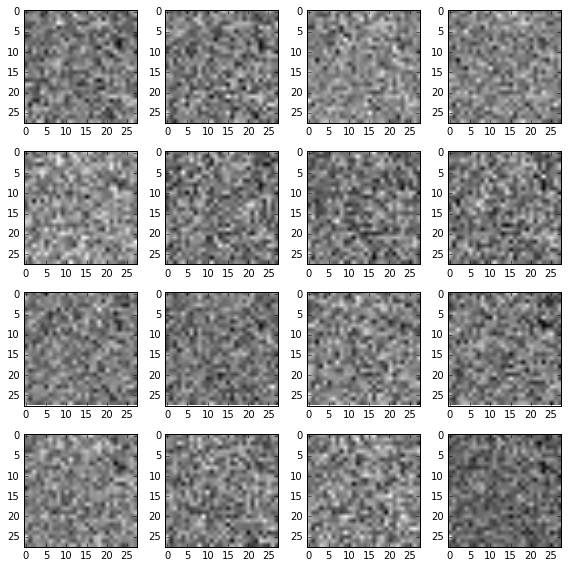

D: [2.3187239016406238]
D: [0.044461386918555945]
D: [0.017635181342484429]
D: [0.01130611909320578]
D: [0.0075276739662513137]
D: [0.0061046657210681587]
D: [0.004713318994618021]
D: [0.0039380341186188161]
D: [0.0035364701034268364]
G: [0.7775835064679768]
D: [1.263011272996664]
D: [0.024679128138814121]
D: [0.012572380306664854]
D: [0.0084652582881972194]
D: [0.0062249757756944746]
D: [0.0049218436470255256]
D: [0.0039138213833211921]
D: [0.0034893973061116412]
D: [0.002984506354550831]
G: [0.68812326906481758]
D: [2.1476061036810279]
D: [0.072977302130311728]
D: [0.023135258408728987]
D: [0.013832204625941813]
D: [0.010062333021778613]
D: [0.0074315834208391607]
D: [0.0061506579513661563]
D: [0.0049218448984902352]
D: [0.0040472599066561088]
G: [0.61919580334051716]
D: [2.3980435561388731]
D: [0.10733360121957958]
D: [0.037136526312679052]
D: [0.35499400889966637]
D: [0.060290302964858711]
D: [0.030103160766884685]
D: [0.018106546951457858]
D: [0.012876413413323462]
D: [0.010497160

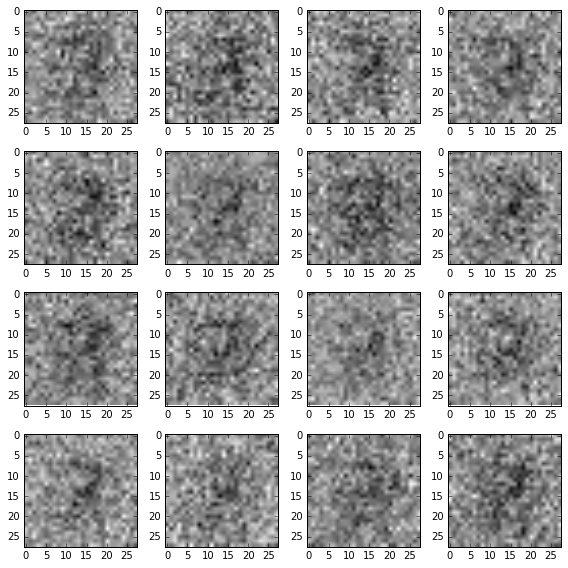

D: [1.3883203100413084]
D: [0.44676156714558601]
D: [0.28212817292660475]
D: [0.35820478852838278]
D: [0.15301505895331502]
D: [0.41286792885512114]
D: [0.12889254791662097]
D: [0.06857892544940114]
D: [0.18033425300382078]
G: [0.28278153156861663]
D: [0.62573458161205053]
D: [0.47854507155716419]
D: [0.17436293372884393]
D: [0.15876633767038584]
D: [0.22943617915734649]
D: [0.15117789106443524]
D: [0.12253387412056327]
D: [0.15992852486670017]
D: [0.12010946450755]
G: [1.2038518860936165]
D: [0.43522988259792328]
D: [0.16903905337676406]
D: [0.13695584982633591]
D: [0.10156683926470578]
D: [0.095947497989982367]
D: [0.14917450165376067]
D: [0.17892736429348588]
D: [0.10698560858145356]
D: [0.074887904105708003]
G: [1.4997927471995354]
D: [0.43735340423882008]
D: [0.18530432693660259]
D: [0.11064291838556528]
D: [0.13224604912102222]
D: [0.12781711900606751]
D: [0.088404354173690081]
D: [0.084065650124102831]
D: [0.10354064288549125]
D: [0.079182997345924377]
G: [1.5612229108810425]
D:

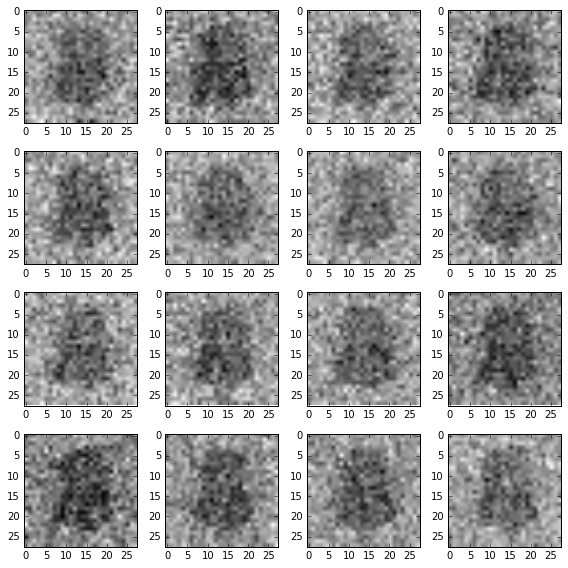

D: [0.16904084011912346]
D: [0.15458279196172953]
D: [0.091204990167170763]
D: [0.067423093831166625]
D: [0.074379504425451159]
D: [0.066193248378112912]
D: [0.064582829363644123]
D: [0.057240839814767241]
D: [0.044945357483811677]
G: [2.1408809721469879]
D: [0.1584133580327034]
D: [0.099437015131115913]
D: [0.079149632249027491]
D: [0.075027091894298792]
D: [0.07501214137300849]
D: [0.069758297177031636]
D: [0.066175965359434485]
D: [0.070151281543076038]
D: [0.10216166405007243]
G: [1.534033939242363]
D: [0.13905599294230342]
D: [0.081993918865919113]
D: [0.06547041074372828]
D: [0.062523675849661231]
D: [0.067266517551615834]
D: [0.07120170327834785]
D: [0.059667156776413321]
D: [0.051987558603286743]
D: [0.049181710928678513]
G: [2.2374990582466125]
D: [0.081794680561870337]
D: [0.073311574757099152]
D: [0.06186101003549993]
D: [0.054105589399114251]
D: [0.049406629288569093]
D: [0.059146230109035969]
D: [0.055967584485188127]
D: [0.048795126378536224]
D: [0.060785720590502024]
G: 

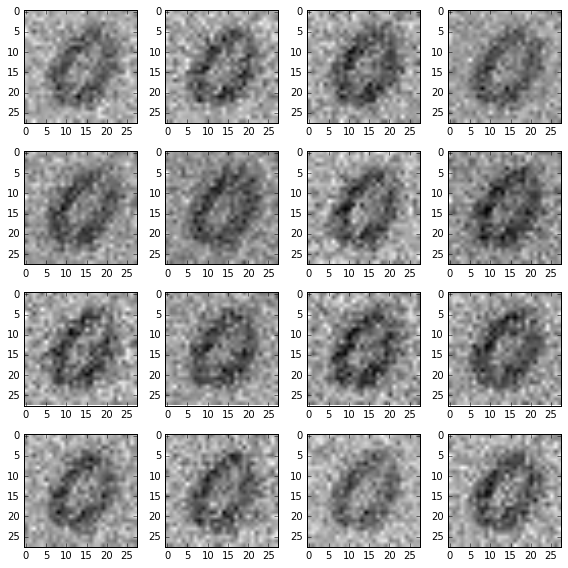

D: [0.15179900848306715]
D: [0.061767266830429435]
D: [0.063165557570755482]
D: [0.045101511757820845]
D: [0.038788497564382851]
D: [0.058115888619795442]
D: [0.088297861162573099]
D: [0.053480910370126367]
D: [0.04035520029719919]
G: [2.3711816370487213]
D: [0.061646236339583993]
D: [0.093795819440856576]
D: [0.060518128797411919]
D: [0.049709137296304107]
D: [0.043597481562756002]
D: [0.039372229715809226]
D: [0.039848787942901254]
D: [0.037602022057399154]
D: [0.056161988992244005]
G: [2.2689719498157501]
D: [0.062136048683896661]
D: [0.046979161561466753]
D: [0.043309215689077973]
D: [0.039551581256091595]
D: [0.035888447659090161]
D: [0.038964376086369157]
D: [0.033973399200476706]
D: [0.050937033491209149]
D: [0.043816856574267149]
G: [2.3063128888607025]
D: [0.065555872395634651]
D: [0.045509622897952795]
D: [0.042884732480160892]
D: [0.041138511383906007]
D: [0.034986539278179407]
D: [0.033136044628918171]
D: [0.037467842805199325]
D: [0.034785270225256681]
D: [0.03031129762530

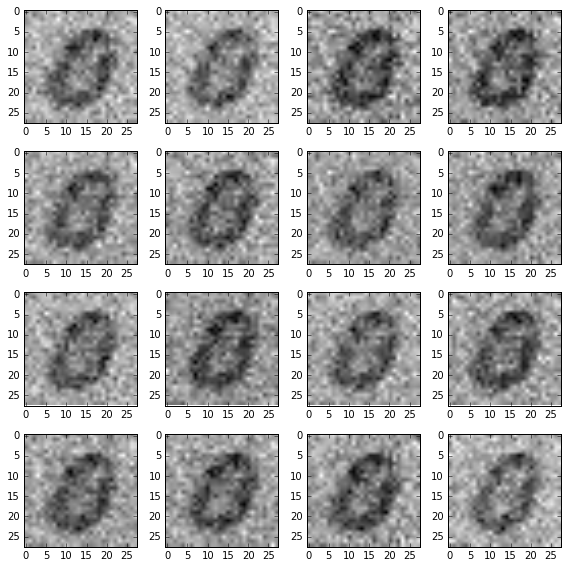

D: [0.086735952645540237]
D: [0.044277198030613363]
D: [0.033979692496359348]
D: [0.030933014466427267]
D: [0.031336959451436996]
D: [0.027996968361549079]
D: [0.063832912012003362]
D: [0.048973504104651511]
D: [0.03766068653203547]
G: [2.4360848069190979]
D: [0.060620366362854838]
D: [0.040621535619720817]
D: [0.033598722773604095]
D: [0.029512080946005881]
D: [0.0266850795596838]
D: [0.02456834918120876]
D: [0.064198278822004795]
D: [0.039325025049038231]
D: [0.031699707033112645]
G: [2.5385662019252777]
D: [0.05575714772567153]
D: [0.038037733058445156]
D: [0.041224408429116011]
D: [0.037319871946237981]
D: [0.031699554063379765]
D: [0.028450586483813822]
D: [0.025912599987350404]
D: [0.02392645284999162]
D: [0.047779347980394959]
G: [2.0958283096551895]
D: [0.072101386031135917]
D: [0.04149502597283572]
D: [0.032135523622855544]
D: [0.026519127422943711]
D: [0.022501627332530916]
D: [0.046967382077127695]
D: [0.033408548450097442]
D: [0.025461406796239316]
D: [0.020564889069646597]

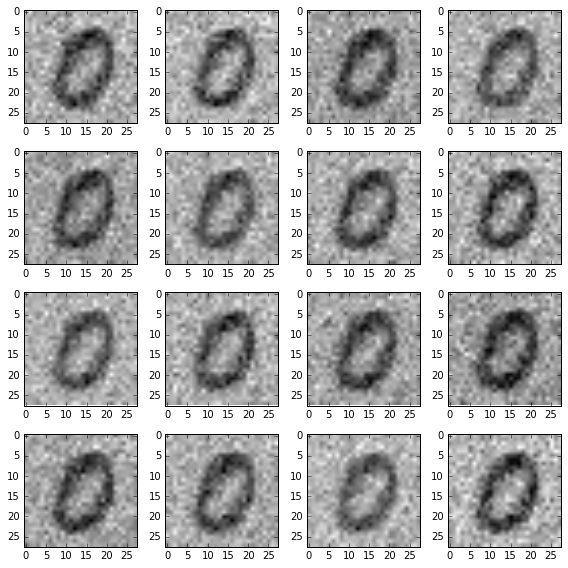

D: [0.032385499565862119]
D: [0.046516716713085771]
D: [0.03286946879234165]
D: [0.027993776253424585]
D: [0.024870381341315806]
D: [0.022470490774139762]
D: [0.028817653656005859]
D: [0.025925835012458265]
D: [0.02302450209390372]
G: [2.9209957420825958]
D: [0.0375904047396034]
D: [0.028606835869140923]
D: [0.034734635031782091]
D: [0.027718308847397566]
D: [0.02345861546928063]
D: [0.024804250337183475]
D: [0.023886792827397585]
D: [0.020922582945786417]
D: [0.018706567934714258]
G: [3.1097310781478882]
D: [0.032206477131694555]
D: [0.02957582485396415]
D: [0.024816030636429787]
D: [0.026038467884063721]
D: [0.022839310928247869]
D: [0.020430430071428418]
D: [0.018785347347147763]
D: [0.022950197802856565]
D: [0.022100590402260423]
G: [2.8524305522441864]
D: [0.05144997825846076]
D: [0.044509784900583327]
D: [0.031996520818211138]
D: [0.027078017592430115]
D: [0.023988149245269597]
D: [0.021639207028783858]
D: [0.021045036788564175]
D: [0.039804549771361053]
D: [0.027178882737644017]

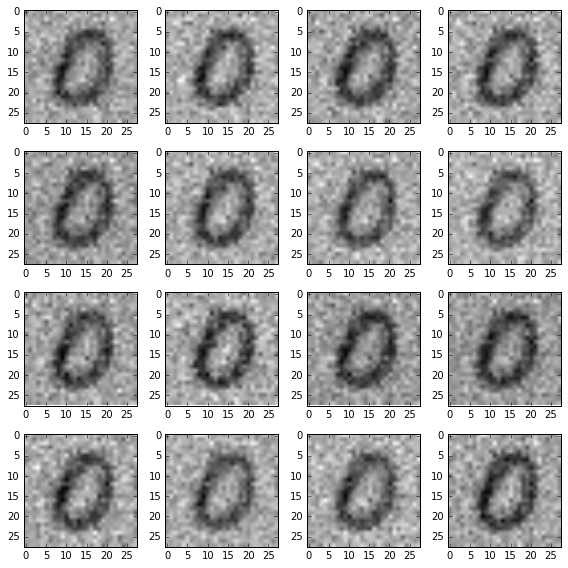

D: [0.057443842757493258]
D: [0.029384095803834498]
D: [0.022895845584571362]
D: [0.022892009932547808]
D: [0.020325404475443065]
D: [0.021761309239082038]
D: [0.023479301249608397]
D: [0.017768101999536157]
D: [0.014333456580061466]
G: [3.2513577044010162]
D: [0.030930419568903744]
D: [0.055282413843087852]
D: [0.030152682564221323]
D: [0.023952379007823765]
D: [0.020745182991959155]
D: [0.018512031063437462]
D: [0.016620898561086506]
D: [0.01660801051184535]
D: [0.014956556900870055]
G: [3.3257621228694916]
D: [0.02680678921751678]
D: [0.024141631671227515]
D: [0.020521424768958241]
D: [0.018847810744773597]
D: [0.018043241812847555]
D: [0.018474362965207547]
D: [0.017157341295387596]
D: [0.016233120986726135]
D: [0.015762868511956185]
G: [3.2372952699661255]
D: [0.028009753441438079]
D: [0.021668988279998302]
D: [0.11812476615887135]
D: [0.046320684137754142]
D: [0.028217168757691979]
D: [0.022462231456302106]
D: [0.018989118747413158]
D: [0.016523755097296089]
D: [0.014590617618523

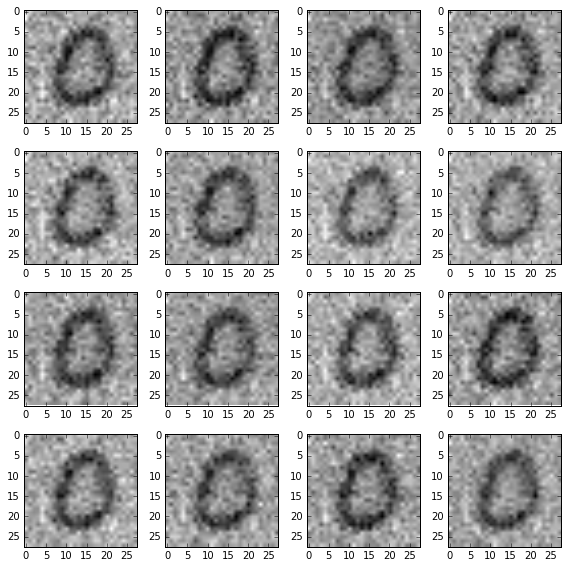

D: [0.039499784703366458]
D: [0.049143796670250595]
D: [0.026820037513971329]
D: [0.020741248968988657]
D: [0.017313261399976909]
D: [0.014938878826797009]
D: [0.01355787378270179]
D: [0.011956815986195579]
D: [0.010616517334710807]
G: [3.6245494782924652]
D: [0.029700200888328254]
D: [0.036506802309304476]
D: [0.024147103424184024]
D: [0.020136956474743783]
D: [0.017861951841041446]
D: [0.016266441263724118]
D: [0.014804145961534232]
D: [0.013673518435098231]
D: [0.012540598429040983]
G: [3.4688605070114136]
D: [0.024463999667204916]
D: [0.018955659121274948]
D: [0.016730051545891911]
D: [0.015152013045735657]
D: [0.03085301851388067]
D: [0.037293077679350972]
D: [0.02242845599539578]
D: [0.017060574318747967]
D: [0.014445535489358008]
G: [2.8812480270862579]
D: [0.056117347907274961]
D: [0.025063303066417575]
D: [0.020628169877454638]
D: [0.016989483614452183]
D: [0.016065200266893953]
D: [0.01324403565376997]
D: [0.011388130311388522]
D: [0.0099806444486603141]
D: [0.008963113214122

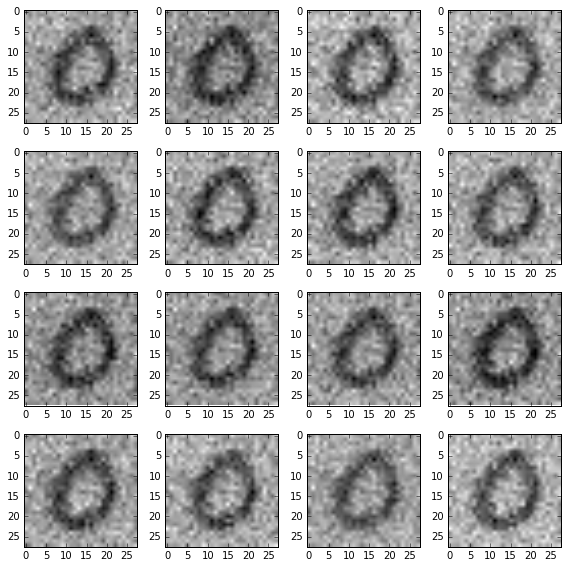

D: [0.034151346771977842]
D: [0.022440336062572896]
D: [0.017448807193432003]
D: [0.024987015698570758]
D: [0.032179361907765269]
D: [0.02256644272711128]
D: [0.018398278742097318]
D: [0.015771399775985628]
D: [0.014063440496101975]
G: [3.2854712903499603]
D: [0.030753712053410709]
D: [0.021558057167567313]
D: [0.017539779888466001]
D: [0.015145393903367221]
D: [0.013368431362323463]
D: [0.014542373479343951]
D: [0.012725057604257017]
D: [0.011358733609085903]
D: [0.010205323836999014]
G: [3.5381173193454742]
D: [0.05018630891572684]
D: [0.026461131987161934]
D: [0.021287510520778596]
D: [0.018425532325636595]
D: [0.016546535771340132]
D: [0.015142644057050347]
D: [0.013987558952067047]
D: [0.012921949150040746]
D: [0.012013539555482566]
G: [3.6299721896648407]
D: [0.016047309385612607]
D: [0.014576589630451053]
D: [0.013884920801501721]
D: [0.013053452130407095]
D: [0.020158383005764335]
D: [0.016181633633095771]
D: [0.014485933294054121]
D: [0.013300446094945073]
D: [0.01242923818062

In [ ]:
batch_size = 256

gen_labels = np.ones(2*batch_size)
gen_labels[:batch_size] = 0
gen_disc_labels = np.ones(batch_size)

for i in range(1000):
    zmb = np.random.uniform(-2, 2, size=(batch_size, 2048)).astype('float32')
    n = np.random.randint(0, data_count-batch_size-1)
    xmb = data[n: n+batch_size].reshape(batch_size, -1)
    
    if i % 10 == 0:
        g_hist = gen_dis.fit(zmb, gen_disc_labels, epochs=1, verbose=0)
        print 'G:', g_hist.history['loss']
    else:
        d_hist = discriminator.fit(np.vstack([generator.predict(zmb),xmb]), gen_labels, epochs=1,verbose=0)
        print 'D:', d_hist.history['loss']
    
    if i % 50 == 0:
        fakes = generator.predict(zmb[:16,:])
        plot_images(fakes)